In [1]:
#this lecture is all about function transformer":
#that mean using mathematical  formoula on the colum to transformer the data.

#there are diffrent type of transformation but we will cover
#log transform
#reciprocal transform 
#square tranasform and 
#Squareroot tansform

# what happen after transform????????????????
# it bring the pdf(probablity density function) into the normal distribution.
#GOAL:the end goal of the transformer is that to distribute the data into the normal distribution.

#Why we do normal distribution????????????????
#stastics work better with normal distribtuion.it work better with linear regression or logistic regressiontype algoritham.


In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.compose import  ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
#how to check the data is normaly distribute or not
#use seaborn distplot
#pd.skew() if ==0 then ook else problem.
#QQplot to analayze the data is distribute or not.

In [14]:
titanic=sns.load_dataset("titanic")

In [19]:
data=titanic[["age","fare","survived"]]

In [20]:
data.sample()

,age,fare,survived
561,40.0,7.8958,0


In [50]:
data["age"]=data["age"].fillna(data["age"].mean())
data[["age"]].isnull().sum()

C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_8240\3266201160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["age"]=data["age"].fillna(data["age"].mean())


age    0
dtype: int64

In [51]:
x=data[["age","fare"]]
y=data[["survived"]]

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
x_train.sample

<bound method NDFrame.sample of            age      fare
331  45.500000   28.5000
733  23.000000   13.0000
382  32.000000    7.9250
704  26.000000    7.8542
813   6.000000   31.2750
..         ...       ...
106  21.000000    7.6500
270  29.699118   31.0000
860  41.000000   14.1083
435  14.000000  120.0000
102  21.000000   77.2875

[712 rows x 2 columns]>

C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_8240\3996522488.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["age"])


Text(0.5, 1.0, 'age pdf')

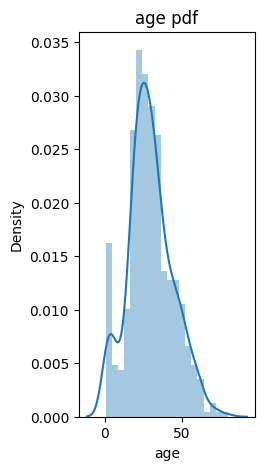

In [38]:
plt.figure(figsize=(5,5))
plt.subplot(121)
sns.distplot(x_train["age"])
plt.title("age pdf")


C:\Users\Waris Hayyat\AppData\Local\Temp\ipykernel_8240\989749422.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train["fare"])


Text(0.5, 1.0, 'fare pdf')

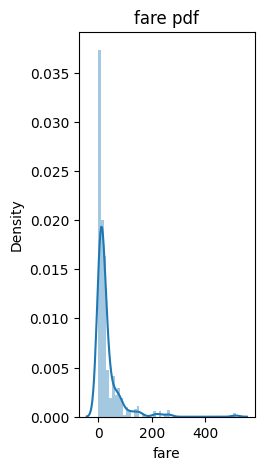

In [54]:
plt.figure(figsize=(5,5))
plt.subplot(121)
sns.distplot(x_train["fare"])
plt.title("fare pdf")

In [55]:
x_train.isnull().sum()

age     0
fare    0
dtype: int64

In [56]:
Lr=LogisticRegression()
Dtc=DecisionTreeClassifier()

In [57]:
Lr.fit(x_train,y_train)
Dtc.fit(x_train,y_train)

C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier()

In [65]:
L_y_pred=Lr.predict(x_test)
D_y_pred=Dtc.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score

In [73]:
Linear_Regression=accuracy_score(L_y_pred,y_test)
Disicion_Regression=accuracy_score(D_y_pred,y_test)

In [77]:
print("Linear regression accuracy:",Linear_Regression)
print("Discion Tree has accuracy of :",Disicion_Regression)

Linear regression accuracy: 0.6480446927374302
Discion Tree has accuracy of : 0.6480446927374302


In [78]:
tnf1=FunctionTransformer(func=np.log1p)

In [79]:
x_train_transformed=tnf1.fit_transform(x_train)
x_test_transformed=tnf1.transform(x_test)

In [81]:
linear=Lr.fit(x_train_transformed,y_train)
Disicion=Dtc.fit(x_train_transformed,y_train)

C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
linear_y_pred=linear.predict(x_test_transformed)
disicion_y_pred=Disicion.predict(x_test_transformed)

In [88]:
print("Linear accuracy:",accuracy_score(linear_y_pred,y_test))
print("Disicion Tree accuracy:",accuracy_score(disicion_y_pred,y_test))

Linear accuracy: 0.6815642458100558
Disicion Tree accuracy: 0.6759776536312849


In [94]:
x_transformed=tnf1.fit_transform(x)
linear=LogisticRegression()
Disicion=DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(linear,x_transformed,y,scoring="accuracy",cv=10)))
print("Disicion",np.mean(cross_val_score(Disicion,x_transformed,y,scoring="accuracy",cv=10)))

C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Waris Hayyat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\uti

LR 0.678027465667915
Disicion 0.658876404494382


Text(0.5, 1.0, 'After before scale')

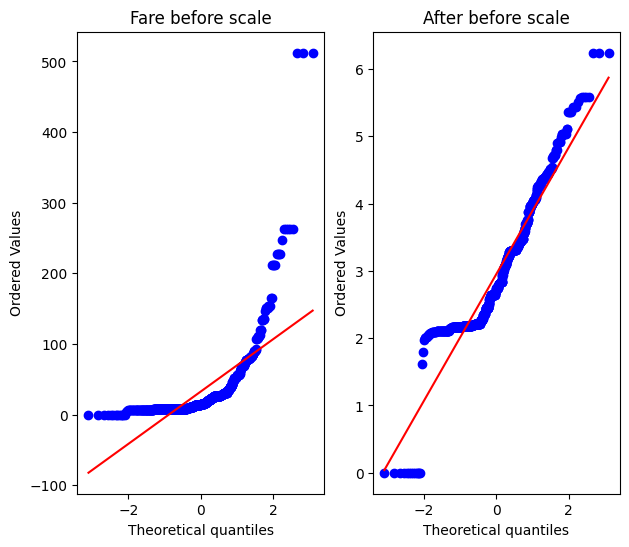

In [106]:
plt.figure(figsize=(7,6))
plt.subplot(121)
stats.probplot(x_train["fare"],dist="norm",plot=plt)
plt.title("Fare before scale")

plt.subplot(122)
stats.probplot(x_train_transformed["fare"],dist="norm",plot=plt)
plt.title("After before scale")

Text(0.5, 1.0, 'age after scale')

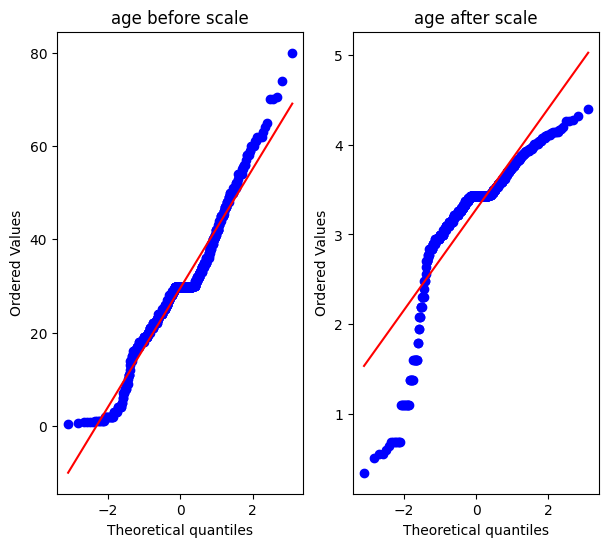

In [108]:
plt.figure(figsize=(7,6))
plt.subplot(121)
stats.probplot(x_train["age"],dist="norm",plot=plt)
plt.title("age before scale")

plt.subplot(122)
stats.probplot(x_train_transformed["age"],dist="norm",plot=plt)
plt.title("age after scale")
#now we can see that our age columns is now skewed that mean applaying function transformer is not eddicent for age columns